In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product 
from sklearn.preprocessing import LabelEncoder

from dataread import DataRead

In [3]:
df_train, df_test, df_items, df_item_categories, df_shops = DataRead('./data/')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc79f6de80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc80c26520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc79f6da30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc80c26c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc80c26fd0>],
 'means': []}

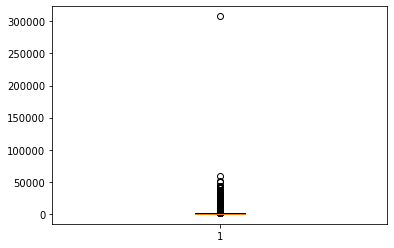

In [4]:
#결측치 처리
plt.boxplot(df_train.item_price)

In [5]:
#맨 위에꺼 날리기
df_train.drop(df_train['item_price'].argmax(), axis = 0, inplace = True)

/Users/koossen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_price'>

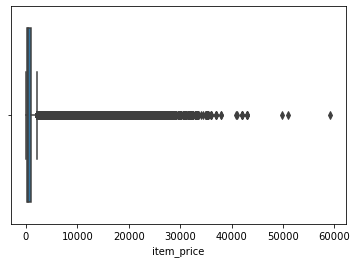

In [6]:
sns.boxplot(df_train.item_price)

In [7]:
df_train.iloc[df_train.item_price.argmax()]

date              2013-09-17 00:00:00
date_block_num                      8
shop_id                            12
item_id                         11365
item_price                    59200.0
item_cnt_day                      1.0
Name: 885138, dtype: object

/Users/koossen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cnt_day'>

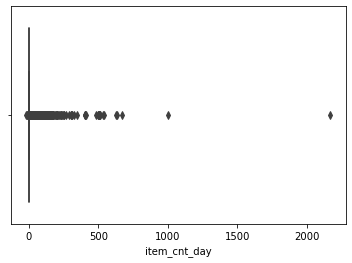

In [8]:
sns.boxplot(df_train.item_cnt_day)

In [9]:
df_train.item_cnt_day.max()

2169.0

In [10]:
df_train[df_train.item_cnt_day ==df_train.item_cnt_day.max() ]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.908714,2169.0


In [11]:
df_train.drop(2909818, axis = 0, inplace =True)

In [12]:
df_train[df_train.item_cnt_day ==df_train.item_cnt_day.max() ]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,2015-01-15,24,12,20949,4.0,1000.0


In [13]:
df_train.drop(2864235, axis = 0, inplace =True)

In [14]:
#shop name 제거
df_shops.drop('shop_name', axis = 1, inplace = True)

In [15]:
#make copy backup
TRAIN = df_train.copy()
TEST = df_test.copy()
ITEM = df_items.copy()
SHOP = df_shops.copy()
CAT = df_item_categories.copy()

데이터 합치기

In [16]:
#train, test data에 shop 도시, type 붙이기
df_test = pd.merge(left =df_test, right = df_shops,on = 'shop_id',
    how = 'left')
df_train = pd.merge(left =df_train, right = df_shops,on = 'shop_id',
    how = 'left')

In [17]:
#item 에 cat subcat 붙익
df_items =pd.merge(left= df_items, right =df_item_categories, on ='item_category_id', how = 'left')

In [18]:
df_items.head()


,item_name,item_id,item_category_id,main_cat,sub_cat
0,во власти наваждения,0,40,Кино,DVD
1,abbyy finereader 12 professional edition full,1,76,Программы,Для дома и офиса (Цифра)
2,в лучах славы,2,40,Кино,DVD
3,голубая волна,3,40,Кино,DVD
4,коробка,4,40,Кино,DVD


In [19]:

ITEM = df_items.copy()

In [20]:
#df_train 에 요일 구하기
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
df_train["day"] = df_train["date"].dt.day

In [21]:
df_train["dayofweek"] = df_train["date"].dt.dayofweek

In [22]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,type,year,month,day,dayofweek
0,2013-01-02,0,59,22154,999.000000,1.0,Ярославль,ТЦ,2013,1,2,2
1,2013-01-03,0,25,2552,899.000000,1.0,Москва,ТРК,2013,1,3,3
2,2013-01-05,0,25,2552,899.000000,-1.0,Москва,ТРК,2013,1,5,5
3,2013-01-06,0,25,2554,1709.050049,1.0,Москва,ТРК,2013,1,6,6
4,2013-01-15,0,25,2555,1099.000000,1.0,Москва,ТРК,2013,1,15,1


In [23]:
onlyonce = df_train.item_cnt_day.value_counts()==1
onlyonce.value_counts()

False    134
True      62
Name: item_cnt_day, dtype: int64

In [24]:
dayofweek = df_train.groupby('dayofweek').sum()
dayofweek

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
dayofweek,,,,,,,,
0,5038988.0,11038727.0,3.397544e+09,306319968.0,401487.0,678797843,2161490,5327924
1,5119210.0,11328564.0,3.483948e+09,320448672.0,454985.0,696307847,2239250,5603709
2,5125293.0,11565720.0,3.579782e+09,319935552.0,436876.0,710780977,2208289,5584172
3,5289423.0,12023550.0,3.743456e+09,329433440.0,454623.0,739620058,2231687,5730324
4,6391438.0,14370003.0,4.512965e+09,397156320.0,553454.0,884651120,2675627,6865980
5,8527998.0,19753596.0,6.080506e+09,512190720.0,734648.0,1188847200,3663961,9448999
6,7282634.0,16807895.0,5.139290e+09,429616224.0,609294.0,1013133662,3162018,7979858


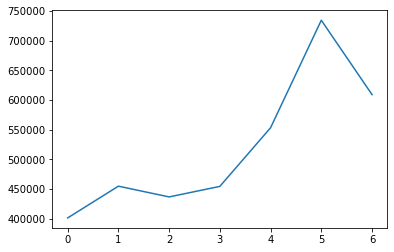

In [25]:
plt.plot(dayofweek.item_cnt_day)

In [26]:
dateblock = df_train.groupby('date_block_num').sum()
dateblock

,shop_id,item_id,item_price,item_cnt_day,year,month,day,dayofweek
date_block_num,,,,,,,,
0,3417068.0,1.183972e+09,82211872.0,131479.0,232883970,115690,1688372,378231
1,3111582.0,1.076044e+09,75580184.0,128090.0,218637969,217226,1608409,382761
2,4016457.0,1.220912e+09,84298312.0,147142.0,244271511,364041,1912838,442298
3,3164978.0,9.713460e+08,61512824.0,107190.0,189441417,376436,1481452,313690
4,3093999.0,9.503730e+08,57274132.0,106970.0,184710867,458795,1452089,301649
5,3364700.0,1.047351e+09,63343616.0,125381.0,202111239,602418,1532721,345557
6,3376156.0,1.067060e+09,62196804.0,116966.0,202403124,703836,1633008,305689
7,3510787.0,1.065971e+09,65438168.0,125291.0,210906036,838176,1707161,348558
8,3208314.0,9.578716e+08,72701568.0,133332.0,193523781,865233,1483229,331360


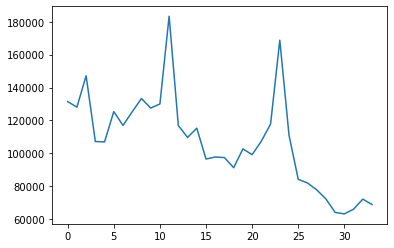

In [27]:
plt.plot(dateblock.item_cnt_day)

In [28]:
dateblock_count = df_train.groupby('date_block_num').count()
dateblock_count

,date,shop_id,item_id,item_price,item_cnt_day,city,type,year,month,day,dayofweek
date_block_num,,,,,,,,,,,
0,115690,115690,115690,115690,115690,115690,115690,115690,115690,115690,115690
1,108613,108613,108613,108613,108613,108613,108613,108613,108613,108613,108613
2,121347,121347,121347,121347,121347,121347,121347,121347,121347,121347,121347
3,94109,94109,94109,94109,94109,94109,94109,94109,94109,94109,94109
4,91759,91759,91759,91759,91759,91759,91759,91759,91759,91759,91759
5,100403,100403,100403,100403,100403,100403,100403,100403,100403,100403,100403
6,100548,100548,100548,100548,100548,100548,100548,100548,100548,100548,100548
7,104772,104772,104772,104772,104772,104772,104772,104772,104772,104772,104772
8,96137,96137,96137,96137,96137,96137,96137,96137,96137,96137,96137


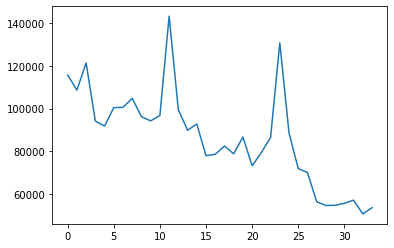

In [29]:
plt.plot(dateblock_count.date)

In [30]:
monthmean = df_train.groupby('month').mean()
monthmean

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,day,dayofweek
month,,,,,,,,
1,10.926028,32.040190,10169.049479,884.536072,1.183779,2013.910502,14.323754,3.335218
2,11.365741,31.448113,9974.591646,836.158752,1.191392,2013.863812,14.900933,3.519151
3,11.829872,33.441278,10171.228591,842.491089,1.212619,2013.819156,15.671323,3.565003
4,13.011205,33.295214,10394.599083,818.581421,1.233406,2013.834267,15.542387,3.361371
5,14.013966,33.396164,10303.044259,816.394470,1.232254,2013.834497,16.210447,3.378307
6,14.685901,33.285286,10310.938790,804.721375,1.208467,2013.807158,15.418674,3.278190
7,15.700780,33.513755,10459.188447,777.564758,1.155737,2013.808398,15.973052,3.080934
8,16.693714,33.583882,10164.498074,791.056396,1.183870,2013.807810,16.584397,3.315778
9,17.514110,33.239921,10014.788868,951.043335,1.385813,2013.792842,15.397492,3.322524


In [31]:
monthcount = df_train.groupby('month').count()
monthcount

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,city,type,year,day,dayofweek
month,,,,,,,,,,,
1,303561,303561,303561,303561,303561,303561,303561,303561,303561,303561,303561
2,270251,270251,270251,270251,270251,270251,270251,270251,270251,270251,270251
3,284057,284057,284057,284057,284057,284057,284057,284057,284057,284057,284057
4,228289,228289,228289,228289,228289,228289,228289,228289,228289,228289,228289
5,224836,224836,224836,224836,224836,224836,224836,224836,224836,224836,224836
6,237428,237428,237428,237428,237428,237428,237428,237428,237428,237428,237428
7,234857,234857,234857,234857,234857,234857,234857,234857,234857,234857,234857
8,248415,248415,248415,248415,248415,248415,248415,248415,248415,248415,248415
9,219881,219881,219881,219881,219881,219881,219881,219881,219881,219881,219881


In [43]:
dateid = df_train.groupby(['date', 'shop_id', 'item_id']).mean()
dateid

date_block_num  item_price  item_cnt_day    year  \
date       shop_id item_id                                                     
2013-01-01 2       991                 0.0        99.0           1.0  2013.0   
                   1472                0.0      2599.0           1.0  2013.0   
                   1905                0.0       249.0           1.0  2013.0   
                   2920                0.0       599.0           2.0  2013.0   
                   3320                0.0      1999.0           1.0  2013.0   
...                                    ...         ...           ...     ...   
2015-10-31 59      20730              33.0       499.0           1.0  2015.0   
                   20866              33.0       699.0           1.0  2015.0   
                   20949              33.0         5.0           1.0  2015.0   
                   21369              33.0       169.0           1.0  2015.0   
                   21449              33.0       449.0           1.0  2015.0   

                            month   day  dayofweek  
date       shop_id item_id                          
2013-01-01 2       991        1.0   1.0        1.0  
                   1472       1.0   1.0        1.0  
                   1905       1.0   1.0        1.0  
                   2920       1.0   1.0        1.0  
                   3320       1.0   1.0        1.0  
...                           ...   ...        ...  
2015-10-31 59      20730     10.0  31.0        5.0  
                   20866     10.0  31.0        5.0  
                   20949     10.0  31.0        5.0  
                   21369     10.0  31.0        5.0  
                   21449     10.0  31.0        5.0  

[2935818 rows x 7 columns]

In [51]:
dateiditem = dateid.reset_index()
dateiditem


,index,date,shop_id,item_id,date_block_num,item_price,item_cnt_day,year,month,day,dayofweek
0,0,2013-01-01,2,991,0.0,99.0,1.0,2013.0,1.0,1.0,1.0
1,1,2013-01-01,2,1472,0.0,2599.0,1.0,2013.0,1.0,1.0,1.0
2,2,2013-01-01,2,1905,0.0,249.0,1.0,2013.0,1.0,1.0,1.0
3,3,2013-01-01,2,2920,0.0,599.0,2.0,2013.0,1.0,1.0,1.0
4,4,2013-01-01,2,3320,0.0,1999.0,1.0,2013.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2935813,2935813,2015-10-31,59,20730,33.0,499.0,1.0,2015.0,10.0,31.0,5.0
2935814,2935814,2015-10-31,59,20866,33.0,699.0,1.0,2015.0,10.0,31.0,5.0
2935815,2935815,2015-10-31,59,20949,33.0,5.0,1.0,2015.0,10.0,31.0,5.0
2935816,2935816,2015-10-31,59,21369,33.0,169.0,1.0,2015.0,10.0,31.0,5.0


In [68]:
dateiditem1= dateiditem[['date', 'shop_id', 'item_id', 'date_block_num', 'month', 'dayofweek', 'item_cnt_day']]

In [69]:
dateiditem1.head()

,date,shop_id,item_id,date_block_num,month,dayofweek,item_cnt_day
0,2013-01-01,2,991,0.0,1.0,1.0,1.0
1,2013-01-01,2,1472,0.0,1.0,1.0,1.0
2,2013-01-01,2,1905,0.0,1.0,1.0,1.0
3,2013-01-01,2,2920,0.0,1.0,1.0,2.0
4,2013-01-01,2,3320,0.0,1.0,1.0,1.0


In [50]:
dateblock_day = dateid.date_block_num.value_counts().sort_index()
dateblock_day
#점점 월 단위 판매 횟수 감소중

0.0     115686
1.0     108611
2.0     121345
3.0      94108
4.0      91759
5.0     100403
6.0     100548
7.0     104772
8.0      96137
9.0      94202
10.0     96736
11.0    143243
12.0     99349
13.0     89829
14.0     92730
15.0     77906
16.0     78528
17.0     82408
18.0     78759
19.0     86612
20.0     73157
21.0     79361
22.0     86427
23.0    130782
24.0     88522
25.0     71805
26.0     69977
27.0     56274
28.0     54548
29.0     54617
30.0     55549
31.0     57029
32.0     50587
33.0     53512
Name: date_block_num, dtype: int64

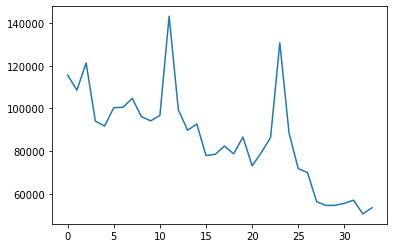

In [49]:
plt.plot(dateid.date_block_num.value_counts().sort_index())

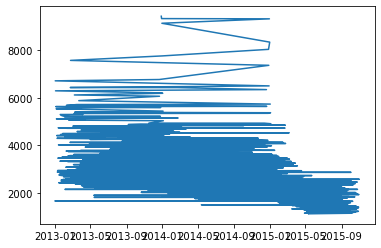

In [46]:
plt.plot(dateid.date.value_counts())

In [32]:
df_train.duplicated().sum()


6

encoding for category, item name shop type city

In [62]:
df_items['main_cat']=LabelEncoder().fit_transform(df_items['main_cat'])
df_items['sub_cat']=LabelEncoder().fit_transform(df_items['sub_cat'])
df_items['item_name']=LabelEncoder().fit_transform(df_items['item_name'])

In [63]:
df_items.head()

,item_name,item_id,item_category_id,main_cat,sub_cat
0,8183,0,40,11,6
1,991,1,76,15,33
2,7771,2,40,11,6
3,8629,3,40,11,6
4,10791,4,40,11,6


In [56]:
df_shops['city'] = LabelEncoder().fit_transform(df_shops['city'])
df_shops['type'] = LabelEncoder().fit_transform(df_shops['type'])
df_shops.head()

,shop_id,city,type
0,0,29,5
1,1,29,11
2,2,0,11
3,3,1,8
4,4,2,11


train: product with shopid , itemid, date for train and test

In [57]:
train_product = []
for i in df_train.date.unique():
    shop = df_train[df_train['date']==i].shop_id.unique()
    item = df_train[df_train['date']==i].item_id.unique()
    train_product.append(np.array(list(product([i], shop, item))))

train1= pd.DataFrame(np.vstack(train_product), columns = ['date', 'shop_id', 'item_id'] )

In [58]:
train_product = train1

In [59]:
train_product.head()

,date,shop_id,item_id
0,2013-01-02,59,22154
1,2013-01-02,59,2565
2,2013-01-02,59,2546
3,2013-01-02,59,2715
4,2013-01-02,59,2716


In [60]:
train_product1= pd.merge(left = train_product, right = df_shops, on= 'shop_id', how= 'left')

In [61]:
train_product1.head()

,date,shop_id,item_id,city,type
0,2013-01-02,59,22154,30,11
1,2013-01-02,59,2565,30,11
2,2013-01-02,59,2546,30,11
3,2013-01-02,59,2715,30,11
4,2013-01-02,59,2716,30,11


In [64]:
train_product2 = pd.merge(left = train_product, right = df_items, on = 'item_id', how= 'left')

In [65]:
train_product2.head()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat
0,2013-01-02,59,22154,18108,37,11,1
1,2013-01-02,59,2565,2151,56,13,5
2,2013-01-02,59,2546,2150,55,13,4
3,2013-01-02,59,2715,2035,19,5,12
4,2013-01-02,59,2716,2035,28,8,34


In [66]:
train_product2.isnull().sum()


date                0
shop_id             0
item_id             0
item_name           0
item_category_id    0
main_cat            0
sub_cat             0
dtype: int64

In [67]:
train_product2.head(50)

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat
0,2013-01-02,59,22154,18108,37,11,1
1,2013-01-02,59,2565,2151,56,13,5
2,2013-01-02,59,2546,2150,55,13,4
3,2013-01-02,59,2715,2035,19,5,12
4,2013-01-02,59,2716,2035,28,8,34
5,2013-01-02,59,2719,2037,19,5,12
6,2013-01-02,59,2480,2054,55,13,4
7,2013-01-02,59,2731,2082,30,8,57
8,2013-01-02,59,2833,2261,30,8,57
9,2013-01-02,59,2808,2232,30,8,57


In [143]:
train_final = pd.merge(left = train_product2, right = dateiditem1, on=['date', 'shop_id', 'item_id'], how= 'left')

In [144]:
train_final.head()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat,date_block_num,month,dayofweek,item_cnt_day
0,2013-01-02,59,22154,18108,37,11,1,0.0,1.0,2.0,1.0
1,2013-01-02,59,2565,2151,56,13,5,NaN,NaN,NaN,NaN
2,2013-01-02,59,2546,2150,55,13,4,NaN,NaN,NaN,NaN
3,2013-01-02,59,2715,2035,19,5,12,NaN,NaN,NaN,NaN
4,2013-01-02,59,2716,2035,28,8,34,NaN,NaN,NaN,NaN


In [140]:
dateiditem1.date_block_num.unique

<bound method Series.unique of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
2935813    33.0
2935814    33.0
2935815    33.0
2935816    33.0
2935817    33.0
Name: date_block_num, Length: 2935818, dtype: float64>

In [115]:
train_final["month"] = train_final["date"].dt.month
train_final["dayofweek"] = train_final["date"].dt.dayofweek

In [128]:
train_final.drop('date_block_num', axis = 1, inplace = True)

In [129]:
train_final.shape

(70512330, 11)

In [118]:
train_final.isnull().sum()

date                0
shop_id             0
item_id             0
item_name           0
item_category_id    0
main_cat            0
sub_cat             0
date_block_num      0
month               0
dayofweek           0
item_cnt_day        0
year                0
dtype: int64

In [84]:
train_final.fillna(0, inplace = True)

In [108]:
train_final["year"] = train_final["date"].dt.year

In [109]:
train_final.head()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat,date_block_num,month,dayofweek,item_cnt_day,year
0,2013-01-02,59,22154,18108,37,11,1,0.0,1.0,2.0,1.0,2013
1,2013-01-02,59,2565,2151,56,13,5,0.0,0.0,0.0,0.0,2013
2,2013-01-02,59,2546,2150,55,13,4,0.0,0.0,0.0,0.0,2013
3,2013-01-02,59,2715,2035,19,5,12,0.0,0.0,0.0,0.0,2013
4,2013-01-02,59,2716,2035,28,8,34,0.0,0.0,0.0,0.0,2013


In [130]:
train_final.to_pickle('./data/prepro2_train.pkl')

test product

In [52]:
test_date = pd.date_range('2015-11-01', periods = 30,  freq = 'd')
test_date

DatetimeIndex(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04',
               '2015-11-05', '2015-11-06', '2015-11-07', '2015-11-08',
               '2015-11-09', '2015-11-10', '2015-11-11', '2015-11-12',
               '2015-11-13', '2015-11-14', '2015-11-15', '2015-11-16',
               '2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20',
               '2015-11-21', '2015-11-22', '2015-11-23', '2015-11-24',
               '2015-11-25', '2015-11-26', '2015-11-27', '2015-11-28',
               '2015-11-29', '2015-11-30'],
              dtype='datetime64[ns]', freq='D')

In [80]:
test_product = []
for i in test_date.values:
    shop = df_test.shop_id.unique()
    item = df_test.item_id.unique()
    test_product.append(np.array(list(product([i], shop, item))))

test_product= pd.DataFrame(np.vstack(test_product), columns = ['date', 'shop_id', 'item_id'] )

In [100]:
test_product[test_product.item_id == 5037]


,date,shop_id,item_id
0,2015-11-01,5,5037
5100,2015-11-01,4,5037
10200,2015-11-01,6,5037
15300,2015-11-01,3,5037
20400,2015-11-01,2,5037
...,...,...,...
6400500,2015-11-30,46,5037
6405600,2015-11-30,41,5037
6410700,2015-11-30,44,5037
6415800,2015-11-30,39,5037


In [85]:
test_product1= pd.merge(left = test_product, right = df_shops, on= 'shop_id', how= 'left')
test_product2 = pd.merge(left = test_product, right = df_items, on = 'item_id', how= 'left')  #null 유지해야 fillna 하면 안됨

In [86]:
test_product2.head(20)

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat
0,2015-11-01,5,5037,4182,19,5,12
1,2015-11-01,5,5320,4275,55,13,4
2,2015-11-01,5,5233,4147,19,5,12
3,2015-11-01,5,5232,4147,23,5,18
4,2015-11-01,5,5268,4139,20,5,13
5,2015-11-01,5,5039,4182,23,5,18
6,2015-11-01,5,5041,4183,20,5,13
7,2015-11-01,5,5046,4187,55,13,4
8,2015-11-01,5,5319,4274,55,13,4
9,2015-11-01,5,5003,4134,20,5,13


In [88]:
test_product2.shape

(6426000, 7)

In [89]:
test_product2.isnull().sum()

date                0
shop_id             0
item_id             0
item_name           0
item_category_id    0
main_cat            0
sub_cat             0
dtype: int64

In [87]:
test_product2.to_pickle('./data/prepro2_test.pkl')

In [98]:
df_test.item_id.isin(df_train.item_id).value_counts() #10프로는 새로운 아이템

True     198954
False     15246
Name: item_id, dtype: int64

In [101]:
test_final = test_product2 

In [105]:
test_final["year"] = test_final["date"].dt.year
test_final["month"] = test_final["date"].dt.month
test_final["dayofweek"] = test_final["date"].dt.dayofweek

In [106]:
test_final.head()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat,year,month,dayofweek
0,2015-11-01,5,5037,4182,19,5,12,2015,11,6
1,2015-11-01,5,5320,4275,55,13,4,2015,11,6
2,2015-11-01,5,5233,4147,19,5,12,2015,11,6
3,2015-11-01,5,5232,4147,23,5,18,2015,11,6
4,2015-11-01,5,5268,4139,20,5,13,2015,11,6


In [107]:
test_final.to_pickle('./data/prepro2_test.pkl')

scaling

In [131]:
train_final.tail()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat,month,dayofweek,item_cnt_day,year
70512325,2015-10-13,21,7895,6425,6,1,18,10,1,0.0,2015
70512326,2015-10-13,21,7712,6367,40,11,6,10,1,0.0,2015
70512327,2015-10-13,21,8113,6597,55,13,4,10,1,0.0,2015
70512328,2015-10-13,21,8169,6645,55,13,4,10,1,0.0,2015
70512329,2015-10-13,21,7524,6113,55,13,4,10,1,0.0,2015


In [123]:
test_final.head()

,date,shop_id,item_id,item_name,item_category_id,main_cat,sub_cat,year,month,dayofweek
0,2015-11-01,5,5037,4182,19,5,12,2015,11,6
1,2015-11-01,5,5320,4275,55,13,4,2015,11,6
2,2015-11-01,5,5233,4147,19,5,12,2015,11,6
3,2015-11-01,5,5232,4147,23,5,18,2015,11,6
4,2015-11-01,5,5268,4139,20,5,13,2015,11,6


In [132]:
test_final.shape

(6426000, 10)

In [133]:
train_final.shape

(70512330, 11)

In [134]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6426000 entries, 0 to 6425999
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   shop_id           object        
 2   item_id           object        
 3   item_name         int64         
 4   item_category_id  object        
 5   main_cat          int64         
 6   sub_cat           int64         
 7   year              int64         
 8   month             int64         
 9   dayofweek         int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 539.3+ MB


In [135]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70512330 entries, 0 to 70512329
Data columns (total 11 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   shop_id           int16         
 2   item_id           int16         
 3   item_name         int64         
 4   item_category_id  int64         
 5   main_cat          int64         
 6   sub_cat           int64         
 7   month             int64         
 8   dayofweek         int64         
 9   item_cnt_day      float32       
 10  year              int64         
dtypes: datetime64[ns](1), float32(1), int16(2), int64(7)
memory usage: 5.3 GB
